# (1) Data exploration

In [7]:
class DataPoint(object):

    def __init__(self, feats):
        self.Clump_Thickness = feats['Clump_Thickness']
        self.Uniformity_of_Cell_Size = feats['Uniformity_of_Cell_Size']
        self.Uniformity_of_Cell_Shape = feats['Uniformity_of_Cell_Shape']
        self.Marginal_Adhesion = feats['Marginal_Adhesion']
        self.Single_Epithelial_Cell_Size = feats['Single_Epithelial_Cell_Size']
        self.Bare_Nuclei = feats['Bare_Nuclei']
        self.Bland_Chromatin = feats['Bland_Chromatin']
        self.Normal_Nucleoli = feats['Normal_Nucleoli']  
        self.Mitoses = feats['Mitoses']  
        self.Class = feats['Class']

In [9]:
def parse_dataset(filename):
    
    data_file = open(filename, 'r')  
    dataset = []  

    for index, line in enumerate(data_file):
 
        Clump_Thickness, Uniformity_of_Cell_Size, Uniformity_of_Cell_Shape, Marginal_Adhesion, Single_Epithelial_Cell_Size, Bare_Nuclei, Bland_Chromatin, Normal_Nucleoli, Mitoses, Class = line.strip().split(',')  
        dataset.append(DataPoint({'Clump_Thickness': int(Clump_Thickness), 'Uniformity_of_Cell_Size': int(Uniformity_of_Cell_Size), 'Uniformity_of_Cell_Shape': int(Uniformity_of_Cell_Shape), \
                                  'Marginal_Adhesion': int(Marginal_Adhesion), 'Single_Epithelial_Cell_Size': int(Single_Epithelial_Cell_Size), 'Bare_Nuclei': int(Bare_Nuclei), \
                                  'Bland_Chromatin': int(Bland_Chromatin), 'Normal_Nucleoli': int(Normal_Nucleoli), 'Mitoses': int(Mitoses), 'Class': int(Class)}))  
  
    return dataset

In [10]:
dataset = parse_dataset('hw4_train.csv')

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Clump_Thickness = []
Uniformity_of_Cell_Size = []
Uniformity_of_Cell_Shape = []
Marginal_Adhesion = []
Single_Epithelial_Cell_Size = []
Bare_Nuclei = []
Bland_Chromatin = []
Normal_Nucleoli = []
Mitoses = []
Class = []

for i in range(len(dataset)):
    Clump_Thickness.append(dataset[i].Clump_Thickness)
    Uniformity_of_Cell_Size.append(dataset[i].Uniformity_of_Cell_Size)
    Uniformity_of_Cell_Shape.append(dataset[i].Uniformity_of_Cell_Shape)
    Marginal_Adhesion.append(dataset[i].Marginal_Adhesion)
    Single_Epithelial_Cell_Size.append(dataset[i].Single_Epithelial_Cell_Size)
    Bare_Nuclei.append(dataset[i].Bare_Nuclei)
    Bland_Chromatin.append(dataset[i].Bland_Chromatin)
    Normal_Nucleoli.append(dataset[i].Normal_Nucleoli)
    Mitoses.append(dataset[i].Mitoses)
    Class.append(dataset[i].Class)

In [12]:
Clump_Thickness = np.array(Clump_Thickness)
Uniformity_of_Cell_Size = np.array(Uniformity_of_Cell_Size)
Uniformity_of_Cell_Shape = np.array(Uniformity_of_Cell_Shape)
Marginal_Adhesion = np.array(Marginal_Adhesion)
Single_Epithelial_Cell_Size = np.array(Single_Epithelial_Cell_Size)
Bare_Nuclei = np.array(Bare_Nuclei)
Bland_Chromatin = np.array(Bland_Chromatin)
Normal_Nucleoli = np.array(Normal_Nucleoli)
Mitoses = np.array(Mitoses)
Class = np.array(Class)

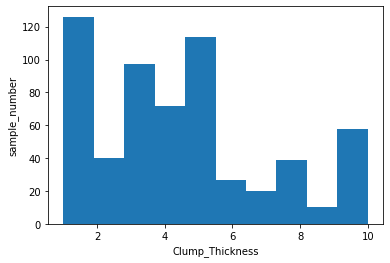

In [15]:
plt.hist(Clump_Thickness)
plt.xlabel("Clump_Thickness")
plt.ylabel("sample_number")
plt.show()

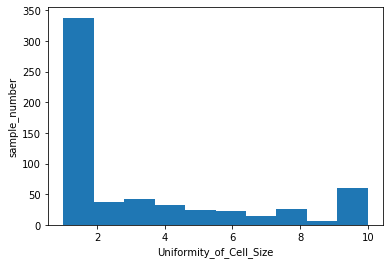

In [16]:
plt.hist(Uniformity_of_Cell_Size)
plt.xlabel("Uniformity_of_Cell_Size")
plt.ylabel("sample_number")
plt.show()

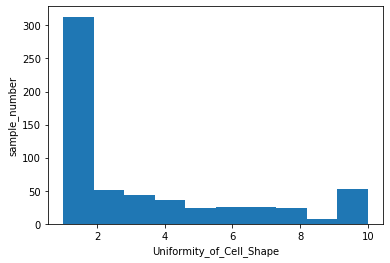

In [18]:
plt.hist(Uniformity_of_Cell_Shape)
plt.xlabel("Uniformity_of_Cell_Shape")
plt.ylabel("sample_number")
plt.show()

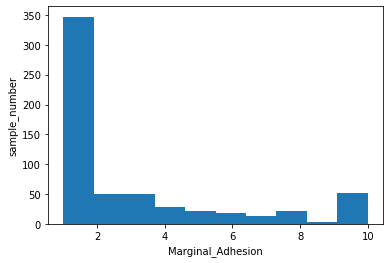

In [19]:
plt.hist(Marginal_Adhesion)
plt.xlabel("Marginal_Adhesion")
plt.ylabel("sample_number")
plt.show()

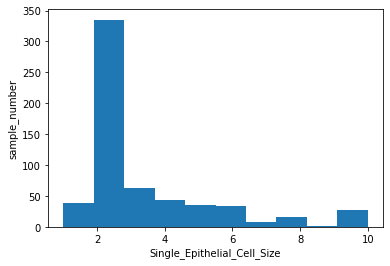

In [20]:
plt.hist(Single_Epithelial_Cell_Size)
plt.xlabel("Single_Epithelial_Cell_Size")
plt.ylabel("sample_number")
plt.show()

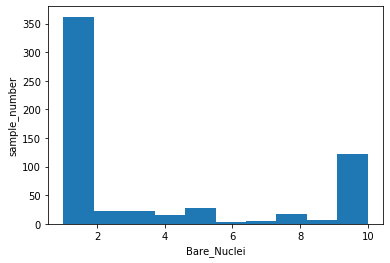

In [21]:
plt.hist(Bare_Nuclei)
plt.xlabel("Bare_Nuclei")
plt.ylabel("sample_number")
plt.show()

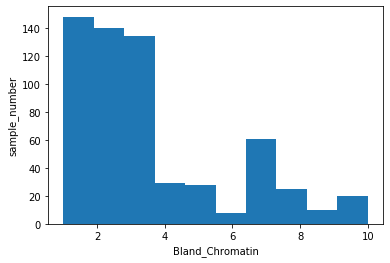

In [22]:
plt.hist(Bland_Chromatin)
plt.xlabel("Bland_Chromatin")
plt.ylabel("sample_number")
plt.show()

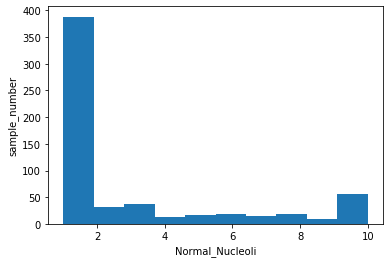

In [23]:
plt.hist(Normal_Nucleoli)
plt.xlabel("Normal_Nucleoli")
plt.ylabel("sample_number")
plt.show()

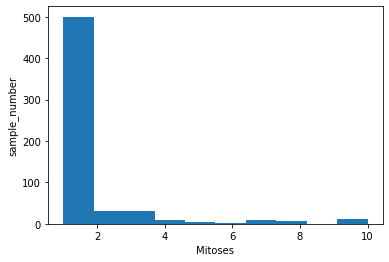

In [24]:
plt.hist(Mitoses)
plt.xlabel("Mitoses")
plt.ylabel("sample_number")
plt.show()

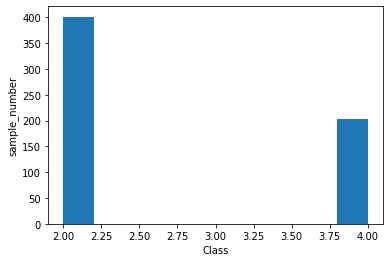

In [32]:
plt.hist(Class,bins=10)
plt.xlabel("Class")
plt.ylabel("sample_number")
plt.show()

In [35]:
print("number of benign samples:", str(Class).count("2"))
print("number of malignant samples:", str(Class).count("4"))

number of benign samples: 401
number of malignant samples: 202


In [88]:
print(dataset[0].Clump_Thickness)

5


# (2) Conditional entropy

In [120]:
# counter
benign_Clump_Thickness = np.zeros(11, dtype = np.int)
benign_Uniformity_of_Cell_Size = np.zeros(11, dtype = np.int)
benign_Uniformity_of_Cell_Shape = np.zeros(11, dtype = np.int)
benign_Marginal_Adhesion = np.zeros(11, dtype = np.int)
benign_Single_Epithelial_Cell_Size = np.zeros(11, dtype = np.int)
benign_Bare_Nuclei = np.zeros(11, dtype = np.int)
benign_Bland_Chromatin = np.zeros(11, dtype = np.int)
benign_Normal_Nucleoli = np.zeros(11, dtype = np.int)
benign_Mitoses = np.zeros(11, dtype = np.int)
malignant_Clump_Thickness = np.zeros(11, dtype = np.int)
malignant_Uniformity_of_Cell_Size = np.zeros(11, dtype = np.int)
malignant_Uniformity_of_Cell_Shape = np.zeros(11, dtype = np.int)
malignant_Marginal_Adhesion = np.zeros(11, dtype = np.int)
malignant_Single_Epithelial_Cell_Size = np.zeros(11, dtype = np.int)
malignant_Bare_Nuclei = np.zeros(11, dtype = np.int)
malignant_Bland_Chromatin = np.zeros(11, dtype = np.int)
malignant_Normal_Nucleoli = np.zeros(11, dtype = np.int)
malignant_Mitoses = np.zeros(11, dtype = np.int)
for i in range(len(dataset)):
    if (dataset[i].Class == 2):
        benign_Clump_Thickness[dataset[i].Clump_Thickness] += 1
        benign_Uniformity_of_Cell_Size[dataset[i].Uniformity_of_Cell_Size] += 1
        benign_Uniformity_of_Cell_Shape[dataset[i].Uniformity_of_Cell_Shape] += 1
        benign_Marginal_Adhesion[dataset[i].Marginal_Adhesion] += 1
        benign_Single_Epithelial_Cell_Size[dataset[i].Single_Epithelial_Cell_Size] += 1
        benign_Bare_Nuclei[dataset[i].Bare_Nuclei] += 1
        benign_Bland_Chromatin[dataset[i].Bland_Chromatin] += 1
        benign_Normal_Nucleoli[dataset[i].Normal_Nucleoli] += 1
        benign_Mitoses[dataset[i].Mitoses] += 1
    else:
        malignant_Clump_Thickness[dataset[i].Clump_Thickness] += 1
        malignant_Uniformity_of_Cell_Size[dataset[i].Uniformity_of_Cell_Size] += 1
        malignant_Uniformity_of_Cell_Shape[dataset[i].Uniformity_of_Cell_Shape] += 1
        malignant_Marginal_Adhesion[dataset[i].Marginal_Adhesion] += 1
        malignant_Single_Epithelial_Cell_Size[dataset[i].Single_Epithelial_Cell_Size] += 1
        malignant_Bare_Nuclei[dataset[i].Bare_Nuclei] += 1
        malignant_Bland_Chromatin[dataset[i].Bland_Chromatin] += 1
        malignant_Normal_Nucleoli[dataset[i].Normal_Nucleoli] += 1
        malignant_Mitoses[dataset[i].Mitoses] += 1

In [121]:
total = len(dataset)

In [122]:
import math
import collections

def conditional_entropy(feature_name):
    
    if (feature_name == "Clump_Thickness"):
        feature = Clump_Thickness
        benign_feature = benign_Clump_Thickness
        malignant_feature = malignant_Clump_Thickness
    if (feature_name == "Uniformity_of_Cell_Size"):
        feature = Uniformity_of_Cell_Size
        benign_feature = benign_Uniformity_of_Cell_Size
        malignant_feature = malignant_Uniformity_of_Cell_Size
    if (feature_name == "Uniformity_of_Cell_Shape"):
        feature = Uniformity_of_Cell_Shape
        benign_feature = benign_Uniformity_of_Cell_Shape
        malignant_feature = malignant_Uniformity_of_Cell_Shape
    if (feature_name == "Marginal_Adhesion"):
        feature = Marginal_Adhesion
        benign_feature = benign_Marginal_Adhesion
        malignant_feature = malignant_Marginal_Adhesion
    if (feature_name == "Single_Epithelial_Cell_Size"):
        feature = Single_Epithelial_Cell_Size
        benign_feature = benign_Single_Epithelial_Cell_Size
        malignant_feature = malignant_Single_Epithelial_Cell_Size
    if (feature_name == "Bare_Nuclei"):
        feature = Bare_Nuclei
        benign_feature = benign_Bare_Nuclei
        malignant_feature = malignant_Bare_Nuclei
    if (feature_name == "Bland_Chromatin"):
        feature = Bland_Chromatin
        benign_feature = benign_Bland_Chromatin
        malignant_feature = malignant_Bland_Chromatin
    if (feature_name == "Normal_Nucleoli"):
        feature = Normal_Nucleoli
        benign_feature = benign_Normal_Nucleoli
        malignant_feature = malignant_Normal_Nucleoli
    if (feature_name == "Mitoses"):
        feature = Mitoses
        benign_feature = benign_Mitoses
        malignant_feature = malignant_Mitoses
    
    num = np.zeros(10, dtype = np.int)
    c = collections.Counter(feature)
    for i in range(10):
        num[i] = c[i+1]

    entropy = 0
    for i in range(10):
        if (benign_Mitoses[i+1]+malignant_Mitoses[i+1] != 0):
            p_benign = benign_feature[i+1]/(benign_feature[i+1]+malignant_feature[i+1])
            p_malignant = malignant_feature[i+1]/(benign_feature[i+1]+malignant_feature[i+1])
            if (p_benign != 0 and p_malignant != 0):
                entropy += num[i]/total * (p_benign * math.log(p_benign, 2) + p_malignant * math.log(p_malignant, 2))
            else:
                continue
        else:
            continue

    entropy = -entropy
    return entropy


In [123]:
print("The conditional entropy for Clump_Thickness:", conditional_entropy("Clump_Thickness"))
print("The conditional entropy for Uniformity_of_Cell_Size:", conditional_entropy("Uniformity_of_Cell_Size"))
print("The conditional entropy for Uniformity_of_Cell_Shape:", conditional_entropy("Uniformity_of_Cell_Shape"))
print("The conditional entropy for Marginal_Adhesion:", conditional_entropy("Marginal_Adhesion"))
print("The conditional entropy for Single_Epithelial_Cell_Size:", conditional_entropy("Single_Epithelial_Cell_Size"))
print("The conditional entropy for Bare_Nuclei:", conditional_entropy("Bare_Nuclei"))
print("The conditional entropy for Bland_Chromatin:", conditional_entropy("Bland_Chromatin"))
print("The conditional entropy for Normal_Nucleoli:", conditional_entropy("Normal_Nucleoli"))
print("The conditional entropy for Mitoses:", conditional_entropy("Mitoses"))

The conditional entropy for Clump_Thickness: 0.4739133764522529
The conditional entropy for Uniformity_of_Cell_Size: 0.20420095259082807
The conditional entropy for Uniformity_of_Cell_Shape: 0.23381960613391517
The conditional entropy for Marginal_Adhesion: 0.4243215691640549
The conditional entropy for Single_Epithelial_Cell_Size: 0.38291093098911816
The conditional entropy for Bare_Nuclei: 0.2754898472623088
The conditional entropy for Bland_Chromatin: 0.3443746672702665
The conditional entropy for Normal_Nucleoli: 0.44262724544642884
The conditional entropy for Mitoses: 0.7009752320926029


# (3) Decision tree classification

In [124]:
data = [[data.Clump_Thickness, data.Uniformity_of_Cell_Size, data.Uniformity_of_Cell_Shape, \
         data.Marginal_Adhesion, data.Single_Epithelial_Cell_Size, data.Bare_Nuclei, \
         data.Bland_Chromatin, data.Normal_Nucleoli, data.Mitoses] for data in dataset]
data = np.array(data)

In [125]:
label = [data.Class for data in dataset]
label = np.array(label)

In [127]:
index = [i for i in range(len(data))] 
np.random.shuffle(index)
data = data[index]
label = label[index]

In [128]:
part_1 = [i for i in range(120)]
part_2 = [i for i in range(120, 240)]
part_3 = [i for i in range(240, 361)]
part_4 = [i for i in range(361, 482)]
part_5 = [i for i in range(482, 603)]

In [129]:
part_1_remain = part_2 + part_3 + part_4 + part_5
part_2_remain = part_1 + part_3 + part_4 + part_5
part_3_remain = part_1 + part_2 + part_4 + part_5
part_4_remain = part_1 + part_2 + part_3 + part_5
part_5_remain = part_1 + part_2 + part_3 + part_4

In [130]:
data_1 = data[part_1]
data_2 = data[part_2]
data_3 = data[part_3]
data_4 = data[part_4]
data_5 = data[part_5]

In [131]:
data_1_remain = data[part_1_remain]
data_2_remain = data[part_2_remain]
data_3_remain = data[part_3_remain]
data_4_remain = data[part_4_remain]
data_5_remain = data[part_5_remain]

In [132]:
label_1 = label[part_1]
label_2 = label[part_2]
label_3 = label[part_3]
label_4 = label[part_4]
label_5 = label[part_5]

In [133]:
label_1_remain = label[part_1_remain]
label_2_remain = label[part_2_remain]
label_3_remain = label[part_3_remain]
label_4_remain = label[part_4_remain]
label_5_remain = label[part_5_remain]

In [134]:
from sklearn.tree import DecisionTreeClassifier

###  5-fold cross-validation on the training set

In [149]:
depths = [2,3,4,5,10,20]
for depth in depths:
    # fold_1
    decision_tree_1 = DecisionTreeClassifier(random_state=0, max_depth=depth)
    decision_tree_1 = decision_tree_1.fit(data_1_remain, label_1_remain)
    score_1 = decision_tree_1.score(data_1, label_1)
    # fold_2
    decision_tree_2 = DecisionTreeClassifier(random_state=0, max_depth=depth)
    decision_tree_2 = decision_tree_2.fit(data_2_remain, label_2_remain)
    score_2 = decision_tree_2.score(data_2, label_2)
    # fold_3
    decision_tree_3 = DecisionTreeClassifier(random_state=0, max_depth=depth)
    decision_tree_3 = decision_tree_3.fit(data_3_remain, label_3_remain)
    score_3 = decision_tree_3.score(data_3, label_3)
    # fold_4
    decision_tree_4 = DecisionTreeClassifier(random_state=0, max_depth=depth)
    decision_tree_4 = decision_tree_4.fit(data_4_remain, label_4_remain)
    score_4 = decision_tree_4.score(data_4, label_4)
    # fold_5
    decision_tree_5 = DecisionTreeClassifier(random_state=0, max_depth=depth)
    decision_tree_5 = decision_tree_5.fit(data_5_remain, label_5_remain)
    score_5 = decision_tree_5.score(data_5, label_5)
    
    average_score = (score_1 + score_2 + score_3 + score_4 + score_5) / 5
    print("-----------------------------------------------------------------")
    print("tree_depth:", depth)
    print("accuracy:", average_score)

-----------------------------------------------------------------
tree_depth: 2
accuracy: 0.9668181818181818
-----------------------------------------------------------------
tree_depth: 3
accuracy: 0.9585399449035812
-----------------------------------------------------------------
tree_depth: 4
accuracy: 0.9601928374655648
-----------------------------------------------------------------
tree_depth: 5
accuracy: 0.9502617079889808
-----------------------------------------------------------------
tree_depth: 10
accuracy: 0.9419283746556474
-----------------------------------------------------------------
tree_depth: 20
accuracy: 0.9419283746556474


### Train the model with tree_depth = 2 and apply it on the test set:

In [150]:
dataset_test = parse_dataset('hw4_test.csv')

In [151]:
data_test = [[data.Clump_Thickness, data.Uniformity_of_Cell_Size, data.Uniformity_of_Cell_Shape, \
         data.Marginal_Adhesion, data.Single_Epithelial_Cell_Size, data.Bare_Nuclei, \
         data.Bland_Chromatin, data.Normal_Nucleoli, data.Mitoses] for data in dataset_test]
data_test = np.array(data_test)

In [152]:
label_test = [data.Class for data in dataset_test]
label_test = np.array(label_test)

In [162]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(data, label)
score = decision_tree.score(data_test, label_test)
print("accuracy:", score)

accuracy: 0.8875


# (4) Random forest tree classification

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
depths = [2,3,4,5,10,20]
number_of_trees = [2,3,4,5,10,30,60,100]
for depth in depths:
    for number_of_tree in number_of_trees:
        # fold_1
        random_forest_1 = RandomForestClassifier(n_estimators=number_of_tree, random_state=0, max_depth=depth)
        random_forest_1 = random_forest_1.fit(data_1_remain, label_1_remain)
        score_1 = random_forest_1.score(data_1, label_1)
        # fold_2
        random_forest_2 = RandomForestClassifier(n_estimators=number_of_tree, random_state=0, max_depth=depth)
        random_forest_2 = random_forest_2.fit(data_2_remain, label_2_remain)
        score_2 = random_forest_2.score(data_2, label_2)
        # fold_3
        random_forest_3 = RandomForestClassifier(n_estimators=number_of_tree, random_state=0, max_depth=depth)
        random_forest_3 = random_forest_3.fit(data_3_remain, label_3_remain)
        score_3 = random_forest_3.score(data_3, label_3)
        # fold_4
        random_forest_4 = RandomForestClassifier(n_estimators=number_of_tree, random_state=0, max_depth=depth)
        random_forest_4 = random_forest_4.fit(data_4_remain, label_4_remain)
        score_4 = random_forest_4.score(data_4, label_4)
        # fold_5
        random_forest_5 = RandomForestClassifier(n_estimators=number_of_tree, random_state=0, max_depth=depth)
        random_forest_5 = random_forest_5.fit(data_5_remain, label_5_remain)
        score_5 = random_forest_5.score(data_5, label_5)

        average_score = (score_1 + score_2 + score_3 + score_4 + score_5) / 5
        print("-----------------------------------------------------------------")
        print("tree_depth:", depth)
        print("number_of_tree:", number_of_tree)
        print("accuracy:", average_score)

-----------------------------------------------------------------
tree_depth: 2
number_of_tree: 2
accuracy: 0.9502203856749312
-----------------------------------------------------------------
tree_depth: 2
number_of_tree: 3
accuracy: 0.9518870523415977
-----------------------------------------------------------------
tree_depth: 2
number_of_tree: 4
accuracy: 0.9618870523415979
-----------------------------------------------------------------
tree_depth: 2
number_of_tree: 5
accuracy: 0.9684986225895316
-----------------------------------------------------------------
tree_depth: 2
number_of_tree: 10
accuracy: 0.9684986225895316
-----------------------------------------------------------------
tree_depth: 2
number_of_tree: 30
accuracy: 0.9668181818181818
-----------------------------------------------------------------
tree_depth: 2
number_of_tree: 60
accuracy: 0.9701515151515151
-----------------------------------------------------------------
tree_depth: 2
number_of_tree: 100
accuracy

### Train the model with tree_depth = 5, number_of_tree = 60 and apply it on the test set:

In [166]:
random_forest = RandomForestClassifier(max_depth=5, n_estimators=60, random_state=0)
random_forest = random_forest.fit(data, label)
score = random_forest.score(data_test, label_test)
print("accuracy:", score)

accuracy: 0.9
